In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('slr_xy.csv')
data.head()

,x,y
0,9.1,0.99523
1,8.0,0.99007
2,9.1,0.99769
3,8.4,0.99386
4,6.9,0.99508


In [3]:
x = data['x'].values.reshape(-1,1)
y = data['y'].values.reshape(-1,1)
m = len(y)  # Number of data points
x

array([[ 9.1],
       [ 8. ],
       [ 9.1],
       [ 8.4],
       [ 6.9],
       [ 7.7],
       [15.6],
       [ 7.3],
       [ 7. ],
       [ 7.2],
       [10.1],
       [11.5],
       [ 7.1],
       [10. ],
       [ 8.9],
       [ 7.9],
       [ 5.6],
       [ 6.3],
       [ 6.7],
       [10.4],
       [ 8.5],
       [ 7.4],
       [ 6.3],
       [ 5.4],
       [ 8.9],
       [ 9.4],
       [ 7.5],
       [11.9],
       [ 7.8],
       [ 7.4],
       [10.8],
       [10.2],
       [ 6.2],
       [ 7.7],
       [13.7],
       [ 8. ],
       [ 6.7],
       [ 6.7],
       [ 7. ],
       [ 8.3],
       [ 7.4],
       [ 9.9],
       [ 6.1],
       [ 7. ],
       [ 5.4],
       [10.7],
       [ 7.6],
       [ 8.9],
       [ 9.2],
       [ 6.6],
       [ 7.2],
       [ 8. ],
       [ 7.8],
       [ 7.9],
       [ 7. ],
       [ 7. ],
       [ 7.6],
       [ 9.1],
       [ 9. ],
       [ 7.9],
       [ 6.6],
       [11.9],
       [ 6.5],
       [ 7.1],
       [ 8.8],
       [ 7.5],
       [ 7

In [4]:
# Normalizing the data
x_mean, x_std = np.mean(x), np.std(x)
y_mean, y_std = np.mean(y), np.std(y)
x_scaled = (x - x_mean) / x_std
y_scaled = (y - y_mean) / y_std

In [5]:
# Initialize parameters
theta0, theta1 = 0.0, 0.0
alpha = 0.5
iterations = 1000
m = len(y_scaled)

In [6]:
# Cost function
def compute_cost(x, y, theta0, theta1):
    h = theta0 + theta1 * x
    cost = (1 / (2 * m)) * np.sum((h - y) ** 2)
    return cost

In [7]:
# Gradient descent
cost_history = []
for _ in range(iterations):
    h = theta0 + theta1 * x_scaled
    cost = compute_cost(x_scaled, y_scaled, theta0, theta1)
    cost_history.append(cost)
    
    d_theta0 = (1 / m) * np.sum(h - y_scaled)
    d_theta1 = (1 / m) * np.sum((h - y_scaled) * x_scaled)
    
    theta0 -= alpha * d_theta0
    theta1 -= alpha * d_theta1
    
    if np.isnan(cost):
        print("NaN encountered! Adjust the learning rate or check data.")
        break
    
    if len(cost_history) > 1 and abs(cost_history[-1] - cost_history[-2]) < 1e-5:
        break

In [8]:
# Unscale predictions for final plot
predicted_y_scaled = theta0 + theta1 * x_scaled
predicted_y = predicted_y_scaled * y_std + y_mean

In [9]:
# Print final cost and parameters
print(f"Final cost: {cost}")
print(f"theta0: {theta0}, theta1: {theta1}")

Final cost: 0.2854485725074284
theta0: -5.98021979159036e-14, theta1: 0.6537850036466645


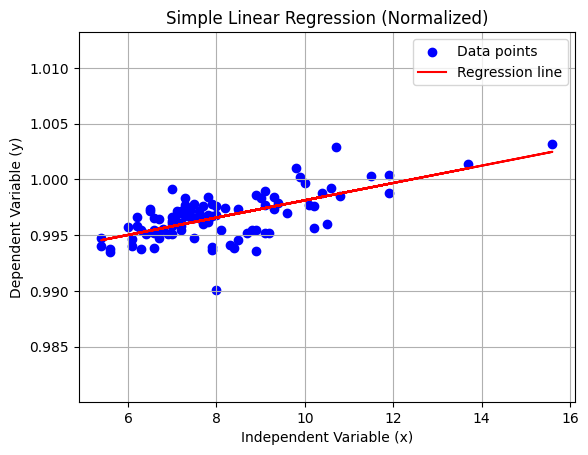

In [10]:
# Plot regression line with scaled data
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, predicted_y, color='red', label='Regression line')
plt.xlabel('Independent Variable (x)')
plt.ylabel('Dependent Variable (y)')
plt.title('Simple Linear Regression (Normalized)')
plt.legend()
plt.grid(True)
plt.ylim(min(y) - 0.01, max(y) + 0.01)  # Adjust the y-axis for better scaling
plt.show()

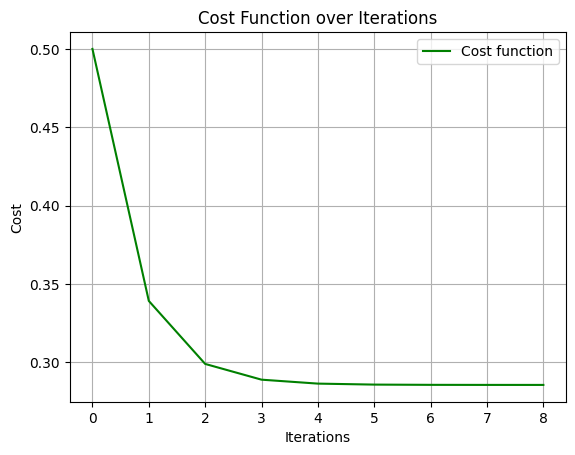

In [11]:
# Plot cost function
plt.plot(range(len(cost_history)), cost_history, color='green', label='Cost function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.legend()
plt.grid(True)
plt.show()